In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.8.0
2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
# from keras.models import Sequential
import cv2 
# from PIL import Image
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tqdm import tqdm
from matplotlib.pyplot import imshow

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader, TensorDataset

import time
import copy
import os

In [ ]:
batch_size = 32
learning_rate = 1e-3

Loading the Dataset

In [ ]:
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 150 #image size
#x1 = pd.read_csv("/content/drive/MyDrive/ADHD/Dataset/Train/train_channel_1.csv", header = None).values #trainer matrix
PATH = '/content/drive/MyDrive/Rice Leaf Disease Images'

In [ ]:
im_size=sz
BACTERIALBLIGHT_DIR= '/content/drive/MyDrive/Rice Leaf Disease Images/Bacterialblight/'
TUNGRO_DIR='/content/drive/MyDrive/Rice Leaf Disease Images/Tungro/'
BROWNSPOT_DIR='/content/drive/MyDrive/Rice Leaf Disease Images/Brownspot/'
BLAST_DIR='/content/drive/MyDrive/Rice Leaf Disease Images/Blast/'




In [ ]:
X_image=[]
Y_label=[]

def data_process(flower_name,DIR):
    c=0
    for img in tqdm(os.listdir(DIR)):
        label=flower_name
        path=os.path.join(DIR,img)
        im=cv2.imread(path,cv2.IMREAD_COLOR)
        imd=cv2.resize(im,(im_size,im_size),cv2.INTER_AREA)
        Y_label.append(str(label))
        X_image.append(np.array(imd))
        c=c+1

    print(str(c)+" images attached successfully to array")

In [ ]:
data_process('Bacterialblight',BACTERIALBLIGHT_DIR)
data_process('Brownspot',BROWNSPOT_DIR)
data_process('Tungro',TUNGRO_DIR)
data_process('Blast',BLAST_DIR)

100%|██████████| 1584/1584 [00:18<00:00, 85.52it/s] 


1584 images attached successfully to array


100%|██████████| 1600/1600 [00:11<00:00, 135.26it/s]


1600 images attached successfully to array


100%|██████████| 1308/1308 [00:11<00:00, 116.53it/s]


1308 images attached successfully to array


100%|██████████| 1440/1440 [00:11<00:00, 123.52it/s]

1440 images attached successfully to array


Encoding The labels

In [ ]:
# name= ['Bacterialblight', 'Tungro', 'Brownspot', 'Blast']
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
Y = label_binarizer.fit_transform(Y_label)

In [ ]:
# X=np.array(X_image)
# tensor_x = torch.Tensor(X) # transform to torch tensor
# tensor_y= torch.Tensor(Y)

In [ ]:
# Y_t=to_categorical(Y_label)

In [ ]:
X_image=np.array(X_image)
X_image= np.moveaxis(X_image,-1,1)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X_image,Y,test_size=0.3)

In [ ]:
device = torch.device('cuda')
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

In [ ]:
train_dataset = TensorDataset(x_train,y_train,)
test_dataset = TensorDataset(x_test, y_test)
# del x_train
# del x_test
# del y_train
# del y_test

In [ ]:
device = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
train_dataloader

In [ ]:
model = torchvision.models.resnet34(pretrained = False)
model = model.to(device)
n_inputs = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(n_inputs,256),nn.Linear(256,4))

In [ ]:
# tf_input=tf.keras.Input(shape=(300,300,3))
# res_model=tf.keras.applications.ResNet50(include_top=False,input_tensor=tf_input,weights='imagenet')
# del X_image


In [ ]:
device

device(type='cuda', index=0)

In [ ]:
# del Y

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
num_epochs = 10
# keeping-track-of-losses 
prediction = []
train_losses = []
valid_losses = []
train_acc = []
valid_acc = []


for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    prediction=[]
    actual_result = []
    train_loss = 0.0
    valid_loss = 0.0

    total = 0
    processed = 0
    total_test = 0
    processed_test = 0
    
    # training-the-model
    model.train().to(device)
    for data, target in tqdm(train_dataloader):
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data).to(device)


        # print("Correct is", correct," Out of", len(data))
            
        # Update pbar-tqdm
        # pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        # train_acc.append("accuracy is",100*correct/processed)
        # print("predicted:",predictions," Correct: ",correct )
        # _, y_pred_tags = torch.max(output, dim = 1)
        # ac= target.cpu()
        # ac= list(ac)
        # actual = np.argmax(ac,axis=1)
        # actual_result.append(actual)

        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        actual_result = target.argmax(dim=1,keepdim= True)
        # correct += pred.eq(target.view_as(pred)).sum().item()
        correct = 0
        for i in range(len(data)):
          if pred[i]==actual_result[i]:
            correct=correct+1
        processed += len(data)
        total = total+correct
                
    # print("Training Accuracy is   ",100*total/processed)    
    # validate-the-model
    model.eval()
    for data, target in test_dataloader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data).to(device)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)

        pred_test = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        actual_result_test = target.argmax(dim=1,keepdim= True)
        # correct += pred.eq(target.view_as(pred)).sum().item()
        correct = 0
        for i in range(len(data)):
          if pred_test[i]==actual_result_test[i]:
            correct=correct+1
        processed_test += len(data)
        total_test = total_test+correct  
    # calculate-average-losses
    train_loss = train_loss/len(train_dataloader.sampler)
    valid_loss = valid_loss/len(test_dataloader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    # print("Testing Accuracy is   ",100*total_test/processed_test)    
    #calculating-accuracy
    # accuracy = []
    # for i in range(len(prediction)):
    #    accuracy.append(accuracy_score(target[i],prediction[i]))
    
    # print('training accuracy: \t', np.average(accuracy))
        
    # print-training/validation-statistics 
    train_accuracy = total/processed
    train_acc.append(train_accuracy)
    test_accuracy = total_test/processed_test
    valid_acc.append(test_accuracy)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\tTraining Accuracy: {:.6f}\tTesting Accuracy: {:.6f}'.format(
        epoch, train_loss, valid_loss, train_accuracy,test_accuracy))
    

100%|██████████| 130/130 [00:33<00:00,  3.91it/s]


Epoch: 1 	Training Loss: 0.790456 	Validation Loss: 1.036225	Training Accuracy: 0.705925	Testing Accuracy: 0.624157


100%|██████████| 130/130 [00:32<00:00,  3.96it/s]


Epoch: 2 	Training Loss: 0.515700 	Validation Loss: 0.394685	Training Accuracy: 0.819364	Testing Accuracy: 0.887079


100%|██████████| 130/130 [00:32<00:00,  3.97it/s]


Epoch: 3 	Training Loss: 0.457370 	Validation Loss: 0.923689	Training Accuracy: 0.839595	Testing Accuracy: 0.689326


100%|██████████| 130/130 [00:32<00:00,  3.98it/s]


Epoch: 4 	Training Loss: 0.396592 	Validation Loss: 0.738109	Training Accuracy: 0.861753	Testing Accuracy: 0.764045


100%|██████████| 130/130 [00:32<00:00,  3.97it/s]


Epoch: 5 	Training Loss: 0.379915 	Validation Loss: 0.568395	Training Accuracy: 0.865848	Testing Accuracy: 0.778652


100%|██████████| 130/130 [00:32<00:00,  4.01it/s]


Epoch: 6 	Training Loss: 0.312284 	Validation Loss: 0.402988	Training Accuracy: 0.884393	Testing Accuracy: 0.888202


100%|██████████| 130/130 [00:32<00:00,  3.95it/s]


Epoch: 7 	Training Loss: 0.272581 	Validation Loss: 0.771670	Training Accuracy: 0.900048	Testing Accuracy: 0.809551


100%|██████████| 130/130 [00:33<00:00,  3.91it/s]


Epoch: 8 	Training Loss: 0.254186 	Validation Loss: 0.325385	Training Accuracy: 0.904624	Testing Accuracy: 0.874719


100%|██████████| 130/130 [00:32<00:00,  3.96it/s]


Epoch: 9 	Training Loss: 0.221922 	Validation Loss: 0.182493	Training Accuracy: 0.919316	Testing Accuracy: 0.944944


100%|██████████| 130/130 [00:32<00:00,  3.98it/s]


Epoch: 10 	Training Loss: 0.165789 	Validation Loss: 0.766846	Training Accuracy: 0.949181	Testing Accuracy: 0.796067


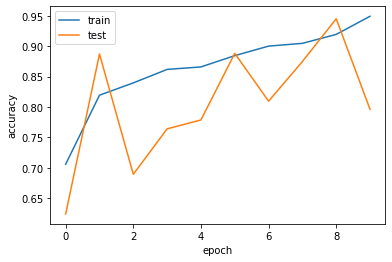

In [ ]:
# summarize history for accuracy
plt.plot(train_acc)
plt.plot(valid_acc)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()